【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


Home Creditはどのような企業？
このコンペティションでは何を予測する？
それを予測することで企業が得られるメリットは何？

In [1]:
#Home Creditはどのような企業？ 
'''
Home Creditは、前向きで安全な借入体験を提供することにより、
銀行口座を持たない人々の金融包摂（きんゆうほうせつ）（「ファイナンシャル・インクルージョン（Financial Inclusion）」とも呼ばれ、手頃なコストで全ての人々に対し、信用や貯蓄、保険、決済、送金などの基本的な金融サービスへのアクセスや利用をできるようにする取り組みをいいます。
）を拡大するよう努めている企業。
'''
#このコンペティションでは何を予測する？ 
'''
Home Creditは、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測する
'''
#それを予測することで企業が得られるメリットは何？
'''
返済可能なクライアントが拒否されないようにし、クライアントが成功するための
元本、満期、および返済カレンダーを使用してローンが提供されるようにします。
'''

'\n返済可能なクライアントが拒否されないようにし、クライアントが成功するための\n元本、満期、および返済カレンダーを使用してローンが提供されるようにします。\n'

【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください。

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DIC/application_train.csv')
# print(df)
print(df.head())
print("デフォルトは先頭5行分が出力される。")
s = '\n'
print(s)
print(df.info())
print(
    ''''
    このメソッドは、以下を含むDataFrameに関する情報を出力します。
インデックスのdtypeと列、null以外の値、およびメモリ使用量。
    '''
)
s = '\n'
print(s)
print(df.describe())
print(
    ''''
    記述統計には、中央を要約した統計が含まれます
の傾向、分散および形状NaN値を除くデータセットの分布。
数値系列とオブジェクト系列の両方を分析します
    '''
)

   SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]
デフォルトは先頭5行分が出力される。


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
'
    このメソッドは、以下を含むDataFrameに関する情報を出力します。
インデックスのdtypeと列、null以外の値、およびメモリ使用量。
    


          SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  ...               265992.000000
mean   278180.518577  ...                    1.899974
std    102790.17

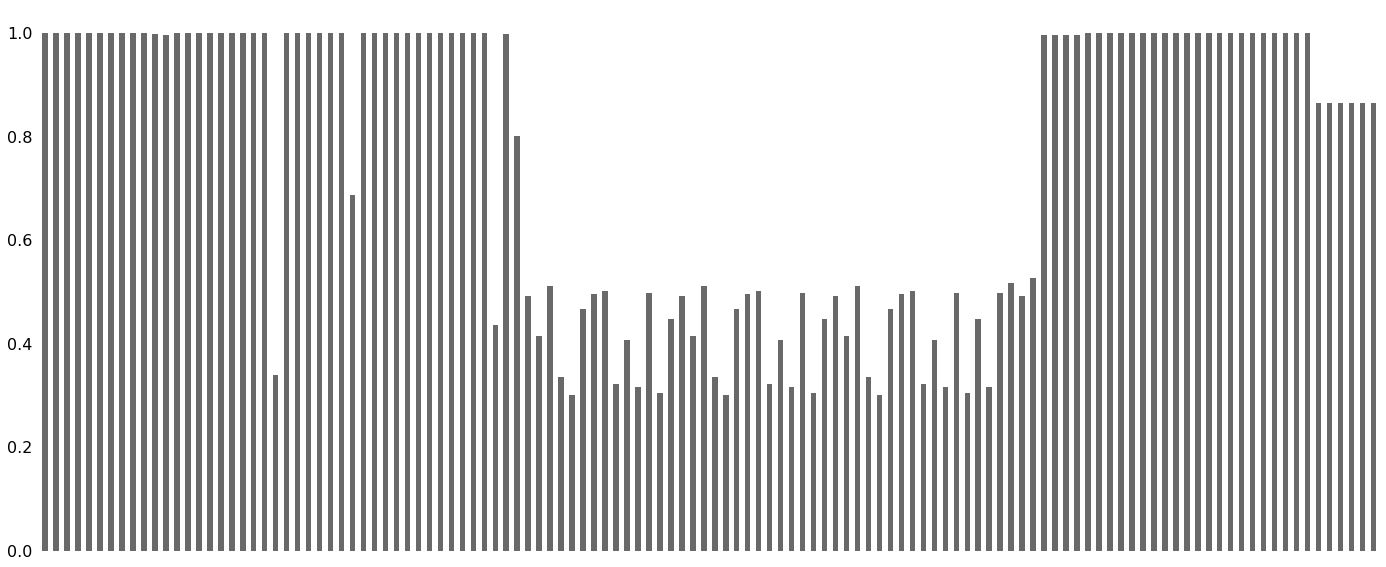

In [3]:
#欠損値の有無を見る 
import missingno as msno
import pandas as pd
%matplotlib inline
#各特徴量でどれくらい欠損値があるのかがわかります。
msno.bar(df)

#⇨ヒストグラムから、半分以上は、欠損値があるのが分かる



In [5]:
#クラスの割合がわかるグラフを描く
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

csv_path = '/content/drive/MyDrive/DIC/application_train.csv'
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する

# 入力: Pandas DataFrameのシリーズ(1列のみ)、バイアス（1.5がデフォルト）
# 出力: 外れ値除去済のシリーズ
# 処理: 四分位範囲を計算してそこからバイアス倍分外側の値をバイアス倍分までにクリップする
# コード
def replace_outlier(series, bias=1.5):
    #四分位数
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1

    #外れ値の基準点
    outlier_min = q1 - (iqr) * bias
    outlier_max = q3 + (iqr) * bias

    print("outlier_min :" + str(outlier_min) + ", outlier_max :" + str(outlier_max))

    #外れ値をクリップする
    series = series.clip(outlier_min, outlier_max)
    return series


#外れ値除去
df['AMT_CREDIT'] = replace_outlier(df['AMT_CREDIT'])#'AMT_CREDIT'ローンの支払額
df['AMT_INCOME_TOTAL'] = replace_outlier(df['AMT_INCOME_TOTAL'])#'AMT_INCOME_TOTAL'収入
df['AMT_GOODS_PRICE'] = replace_outlier(df['AMT_GOODS_PRICE'])#'AMT_GOODS_PRICE'家の価格(だと思う)(ローンをした目的の商品の価格)
df['AMT_ANNUITY'] = replace_outlier(df['AMT_ANNUITY'])#'AMT_ANNUITY'一年あたりのローンの支払額


#targetのデータフレーム作成
drop_index = df.index[df['TARGET']==0]
target_df = df.drop(drop_index)
target_df = target_df.sample(300)#サンプル数を３００へ絞り込み

#targetではないデータフレーム作成
drop_index = df.index[df['TARGET']==1]
non_target_df = df.drop(drop_index)
non_target_df = non_target_df.sample(300)#サンプル数を３００へ絞り込み

#男性のデータフレーム作成
drop_index = df.index[df['CODE_GENDER']=='F']
m_df = df.drop(drop_index)
m_df = m_df.sample(300)#サンプル数を３００へ絞り込み

#女性のデータフレーム作成
drop_index = df.index[df['CODE_GENDER']=='M']
f_df = df.drop(drop_index)
f_df = f_df.sample(300)#サンプル数を３００へ絞り込み

import statistics
import math
mean = statistics.mean(df['AMT_INCOME_TOTAL'])
print(mean)
#平均収入以上のデータフレーム作成
drop_index = df.index[df['AMT_INCOME_TOTAL'] < 162600]
highincome_df = df.drop(drop_index)
highincome_df = highincome_df.sample(300)#サンプル数を３００へ絞り込み


#平均収入以下のデータフレーム作成
drop_index = df.index[df['AMT_INCOME_TOTAL'] > 162600]
lowincome_df = df.drop(drop_index)
lowincome_df = lowincome_df.sample(300)#サンプル数を３００へ絞り込み

#スキャッターの関数
def plt_scatter(x,y):
  print('-----------' + x + 'と' + y + 'の関係')
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.set_xlabel(x)
  ax.set_ylabel(y)
  ax.scatter(target_df[x], target_df[y], c='r', alpha=0.5)
  ax.scatter(non_target_df[x], non_target_df[y], c='b', alpha=0.5)
  ax.legend(['Target','Non-Target'])
  plt.show()


#ヒストグラムの関数
def plt_hist(x):
  print('-----------' + 'Male'+'と'+'Female' + '----------')
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.hist(m_df[x], color='red', alpha=0.5)
  ax.hist(f_df[x], color='blue', alpha=0.5)
  ax.set_xlabel(x)
  ax.set_ylabel('vol')
  ax.legend(['Male','Female'])
  fig.show()


# #ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
# def plt_pie(x,y):
#   labels = ["x", "y"]
#   data = [(x/(x+y))*100], (y/(x+y))*100]
#   ax.set_xlabel(x)
#   ax.set_ylabel(y)
#   plt.pie(data, labels=labels, autopct="%1.1f%%", counterclock=False)
#   plt.pie(data, labels=labels, autopct="%1.1f%%", counterclock=False)
#   plt.title("Number of samples per label")
#   plt.show()

outlier_min :-537975.0, outlier_max :1616625.0
outlier_min :-22500.0, outlier_max :337500.0
outlier_min :-423000.0, outlier_max :1341000.0
outlier_min :-10584.0, outlier_max :61704.0
162626.94787742553


-----------AMT_INCOME_TOTALとAMT_CREDITの関係


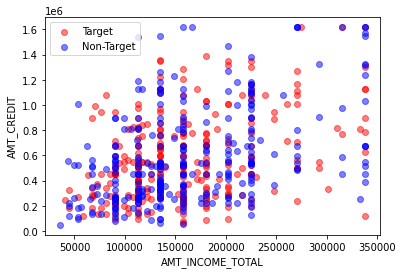

In [6]:
plt_scatter('AMT_INCOME_TOTAL','AMT_CREDIT')
#'AMT_INCOME_TOTAL（収入）'が減ると'AMT_CREDIT（ローンの支払額）'が減っている傾向がある。TargetとNon-Targetには関係なく、その傾向がある。


-----------AMT_INCOME_TOTALとAMT_ANNUITYの関係


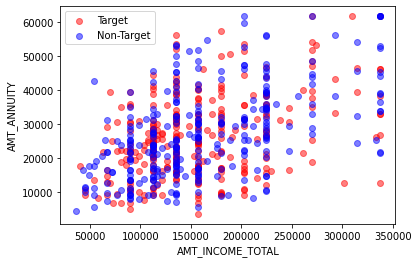

In [7]:
plt_scatter('AMT_INCOME_TOTAL','AMT_ANNUITY')
#'AMT_INCOME_TOTAL(収入)'が少ないと'AMT_ANNUITY（一年あたりのローンの支払額）も少ない傾向にある'

-----------MaleとFemale----------


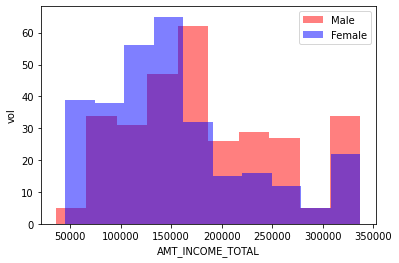

In [8]:
plt_hist('AMT_INCOME_TOTAL')
#収入は女性の方が少ない人が若干多い傾向がある

-----------MaleとFemale----------


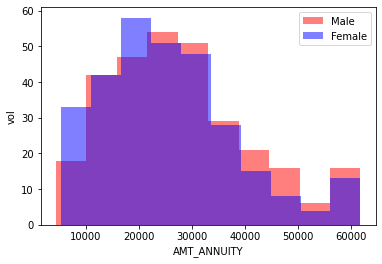

In [9]:
plt_hist('AMT_ANNUITY')
#一年あたりのローンの支払額は女性の方が少ない人が若干多い、男性の方が若干多い傾向がある

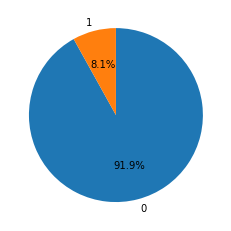

In [14]:
target_count = df['TARGET'].value_counts()

plt.pie(target_count,
        labels=target_count.index,
        startangle = 90,
        counterclock=False,
        autopct='%.1f%%')
plt.show()
#ターゲットとnon-targetをグラフ化して比較すると、以下のようになる。


【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

課題設定・・・問題2のクラスの割合が分かるグラフを描いたが、１２２クラスのどれが、信用情報になるのか分からない。分かるような方法を考えるのが課題。データが大きな場合、どのように全体で重要なデータを把握するのか。

【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa801d8b250>,
      dtype=object)

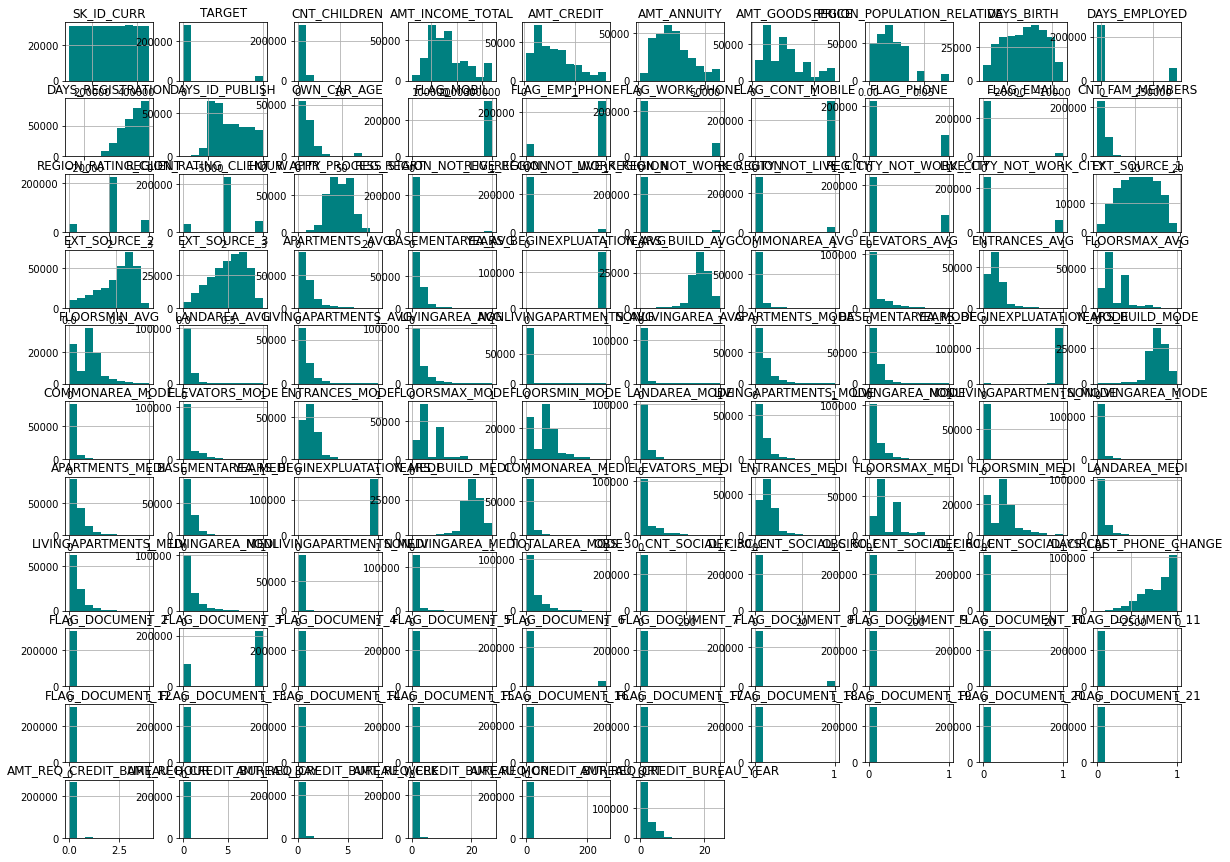

In [15]:
#それぞれのクラスごとのヒストグラム作成する。
import seaborn as sns
import matplotlib.pyplot as plt
# ヒストグラムを作成
df.hist(bins=10, figsize=(20,15), color = 'teal')

ヒストグラムにすることで、クラスの中で、初めに全てデータが集まっているものとそうでないデータの分布があることが分かった。

【問題5】（アドバンス課題）Notebooksへの投稿
必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。